In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
#Training Data
train_df = pd.read_excel("Final_Train.xlsx")

In [3]:
#Testing Data
test_df = pd.read_excel("Final_Test.xlsx")

In [4]:
train_df.shape,test_df.shape

((5961, 7), (1987, 6))

In [5]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5961 entries, 0 to 5960
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Qualification       5961 non-null   object
 1   Experience          5961 non-null   object
 2   Rating              2659 non-null   object
 3   Place               5936 non-null   object
 4   Profile             5961 non-null   object
 5   Miscellaneous_Info  3341 non-null   object
 6   Fees                5961 non-null   int64 
dtypes: int64(1), object(6)
memory usage: 326.1+ KB


In [6]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1987 entries, 0 to 1986
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Qualification       1987 non-null   object
 1   Experience          1987 non-null   object
 2   Rating              897 non-null    object
 3   Place               1981 non-null   object
 4   Profile             1987 non-null   object
 5   Miscellaneous_Info  1153 non-null   object
dtypes: object(6)
memory usage: 93.3+ KB


 - We can see that in both the dataset train_df and test_df we have some null values:

In [7]:
#test dataset
test_df.head()

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info
0,MBBS,35 years experience,NaN,"Ghatkopar East, Mumbai",General Medicine,NaN
1,"MBBS, Diploma in Otorhinolaryngology (DLO)",31 years experience,NaN,"West Marredpally, Hyderabad",ENT Specialist,NaN
2,"MBBS, DDVL",40 years experience,70%,"KK Nagar, Chennai",Dermatologists,"70% 4 Feedback KK Nagar, Chennai"
3,BAMS,0 years experience,NaN,"New Ashok Nagar, Delhi",Ayurveda,NaN
4,"BDS, MDS - Conservative Dentistry & Endodontics",16 years experience,100%,"Kanakpura Road, Bangalore",Dentist,General Dentistry Conservative Dentistry Cosme...


In [8]:
#train dataset
train_df.head()

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees
0,"BHMS, MD - Homeopathy",24 years experience,100%,"Kakkanad, Ernakulam",Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100
1,"BAMS, MD - Ayurveda Medicine",12 years experience,98%,"Whitefield, Bangalore",Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350
2,"MBBS, MS - Otorhinolaryngology",9 years experience,NaN,"Mathikere - BEL, Bangalore",ENT Specialist,NaN,300
3,"BSc - Zoology, BAMS",12 years experience,NaN,"Bannerghatta Road, Bangalore",Ayurveda,"Bannerghatta Road, Bangalore ₹250 Available on...",250
4,BAMS,20 years experience,100%,"Keelkattalai, Chennai",Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250


 - Observation:
   - All the columns except Fees are of object datatype
   - Need to extract the integer from Experience and Rating column
   - We can segregate City and Area from Place column
   - Need to handle various missing values from different columns

In [9]:
# Checking the Maximum and Minimum number of qualifications in both the dataset

# Training set
train_data = train_df.Qualification.apply(lambda x: len(x.split(',')))
print("Maximum Qualifications of a doctor in Train dataset is {}\n".format(train_data.max()))
print("Which are : {}\n\n".format(train_df.Qualification[train_data.idxmax()]))
print("Minimum qualification of a doctor in Train dataset is {}\n".format(train_data.min()))
print("Which is : {}\n\n".format(train_df.Qualification[train_data.idxmin()]))

# Testing set
test_data = test_df.Qualification.apply(lambda x: len(x.split(',')))
print("Maximum Qualifications of a doctor in Test dataset is {}\n".format(test_data.max()))
print("Which are : {}\n\n".format(test_df.Qualification[test_data.idxmax()]))
print("Minimum qualification of a doctor in Test dataset is {}\n".format(test_data.min()))
print("Which is : {}".format(test_df.Qualification[test_data.idxmin()]))

Maximum Qualifications of a doctor in Train dataset is 10

Which are : Fellowship in Oral implantlogy, Certified Advance Course In Endodontics, Certified in Orthodontics, Certification in Full Mouth Rehabilitation, Certified BPS Dentist, Certificate in Cosmetic Dentistry, Professional Implantology Training Course (PITC), Fellowship in Advanced Endoscopic Sinus Surgery, Degree in Dental Implant, Fellowship in Lasers & Cosmetology


Minimum qualification of a doctor in Train dataset is 1

Which is : BAMS


Maximum Qualifications of a doctor in Test dataset is 17

Which are : BDS, PG Diploma in Conservative, Endodontics and Aesthetic Dentistry, Fellowship In Clinical Cosmetology, PG Diploma In Clinical Cosmetology (PGDCC), MBA - Hospital Management, Diploma in Cosmetic Dentistry, Fellow of Academy of General Education (FAGE), Advanced Retreatment Course in RCT, Advanced Endotontic Course On Root Canal, Certified Course in Oral Surgery, MIDA, Certification in Prosthodontics & Periodontolog

 - We can see that in Train data we have max qualification number of 10 and minimum is of 1
 - Similarley in Test data we have max qualification number of 17 and minimum is of 1

In [10]:
# Addition of 'No_of_Qualification' column:
train_df['No_of_Qual'] = train_df.Qualification.apply(lambda x: len(x.split(',')))
test_df['No_of_Qual'] = test_df.Qualification.apply(lambda x: len(x.split(',')))

 - I am adding a column here which will give the count of number of qualifications for each doctor

In [11]:
train_df.head()

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees,No_of_Qual
0,"BHMS, MD - Homeopathy",24 years experience,100%,"Kakkanad, Ernakulam",Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100,2
1,"BAMS, MD - Ayurveda Medicine",12 years experience,98%,"Whitefield, Bangalore",Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350,2
2,"MBBS, MS - Otorhinolaryngology",9 years experience,NaN,"Mathikere - BEL, Bangalore",ENT Specialist,NaN,300,2
3,"BSc - Zoology, BAMS",12 years experience,NaN,"Bannerghatta Road, Bangalore",Ayurveda,"Bannerghatta Road, Bangalore ₹250 Available on...",250,2
4,BAMS,20 years experience,100%,"Keelkattalai, Chennai",Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250,1


In [12]:
test_df.head()

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,No_of_Qual
0,MBBS,35 years experience,NaN,"Ghatkopar East, Mumbai",General Medicine,NaN,1
1,"MBBS, Diploma in Otorhinolaryngology (DLO)",31 years experience,NaN,"West Marredpally, Hyderabad",ENT Specialist,NaN,2
2,"MBBS, DDVL",40 years experience,70%,"KK Nagar, Chennai",Dermatologists,"70% 4 Feedback KK Nagar, Chennai",2
3,BAMS,0 years experience,NaN,"New Ashok Nagar, Delhi",Ayurveda,NaN,1
4,"BDS, MDS - Conservative Dentistry & Endodontics",16 years experience,100%,"Kanakpura Road, Bangalore",Dentist,General Dentistry Conservative Dentistry Cosme...,2


In [13]:
# NUll values
train_df.isnull().sum()

Qualification            0
Experience               0
Rating                3302
Place                   25
Profile                  0
Miscellaneous_Info    2620
Fees                     0
No_of_Qual               0
dtype: int64

 - We can see that we have got columns like Rating, Place and Miscellaneous_Info which have null values

 - Lets handle the missing values and extract the Integer value from Experience and Rating column

In [14]:
#Extracting Integer Value from Experience column:
for i in train_df['Experience'].value_counts().index:
    x=i.split()
    train_df['Experience'].replace(i,int(x[0]),inplace=True)

for i in test_df['Experience'].value_counts().index:
    val=i.split()
    test_df['Experience'].replace(i,int(val[0]),inplace=True)

In [15]:
# Handling Missing Value
for i in train_df['Miscellaneous_Info'].value_counts().index:
    train_df['Miscellaneous_Info'].replace(i,int(1),inplace=True)
    train_df['Miscellaneous_Info'].fillna(int(0),inplace=True)

for i in test_df['Miscellaneous_Info'].value_counts().index:
    test_df['Miscellaneous_Info'].replace(i,int(1),inplace=True)
    test_df['Miscellaneous_Info'].fillna(int(0),inplace=True)

 - So In the above cell I am replacing the column which have Miscellaneous information with 1 and which dosent have any Miscellaneous information i.e. which are null with 0.

In [16]:
train_df['Area']=train_df['Place'].str.rsplit(',',1).str.get(0)
test_df['Area']=test_df['Place'].str.rsplit(',',1).str.get(0)

 - In the above cell I am seperating Area from Place column

In [17]:
for i in train_df['Place'].value_counts().index:
    p1=i.split()
    train_df['Place'].replace(i,p1[-1],inplace=True)
    
for i in test_df['Place'].value_counts().index:
    p2=i.split()
    test_df['Place'].replace(i,p2[-1],inplace=True)

 - Now let's replace the column Place with just place name only.
 - And those rows which have null values for these two column Area and Place, I am replacing them with Not_Available

In [18]:
liz = train_df.groupby(['Place']).count()
liz['Qualification']

Place
Bangalore             1258
Chennai                855
Coimbatore             228
Delhi                 1185
Ernakulam              153
Hyderabad              951
Mumbai                1219
Thiruvananthapuram      86
e                        1
Name: Qualification, dtype: int64

In [19]:
index = train_df[train_df['Place'] == 'e'].index
index

Int64Index([3980], dtype='int64')

In [20]:
train_df = train_df.drop([3980])

In [21]:
train_df['Place'] = train_df['Place'].fillna('Not_Available')
train_df['Area'] = train_df['Area'].fillna('Not_Available')
test_df['Place'] = test_df['Place'].fillna('Not_Available')
test_df['Area'] = test_df['Area'].fillna('Not_Available')

 - Rating

In [22]:
train_df['Rating']=train_df['Rating'].replace(np.nan,'0%')

 - So, there are around 3000 rows which are having NaN value for Rating. I will replace them with 0 as replacing them with mean or mode will not be a good choice.

In [23]:
train_df['Rating'] = train_df['Rating'].str.slice(stop=-1).astype(int)

 - Lets Extract the integer value from and remove the percenrage symbol from the rating column.

In [24]:
test_df['Rating'] = test_df['Rating'].replace(np.nan,'0%')

In [25]:
test_df['Rating'] = test_df['Rating'].str.slice(stop=-1).astype(int)

 - We are going to do the same thing with the test dataset.

In [26]:
train_df.head()

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees,No_of_Qual,Area
0,"BHMS, MD - Homeopathy",24,100,Ernakulam,Homeopath,1,100,2,Kakkanad
1,"BAMS, MD - Ayurveda Medicine",12,98,Bangalore,Ayurveda,1,350,2,Whitefield
2,"MBBS, MS - Otorhinolaryngology",9,0,Bangalore,ENT Specialist,0,300,2,Mathikere - BEL
3,"BSc - Zoology, BAMS",12,0,Bangalore,Ayurveda,1,250,2,Bannerghatta Road
4,BAMS,20,100,Chennai,Ayurveda,1,250,1,Keelkattalai


In [27]:
train_df.isnull().sum()

Qualification         0
Experience            0
Rating                0
Place                 0
Profile               0
Miscellaneous_Info    0
Fees                  0
No_of_Qual            0
Area                  0
dtype: int64

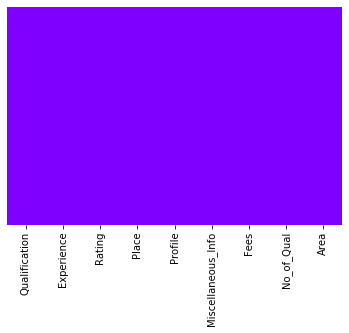

In [28]:
sns.heatmap(train_df.isnull(),yticklabels=False,cbar=False,cmap='rainbow')

 - So, now we have our Train dataset with no Null Values

In [29]:
test_df.isnull().sum()

Qualification         0
Experience            0
Rating                0
Place                 0
Profile               0
Miscellaneous_Info    0
No_of_Qual            0
Area                  0
dtype: int64

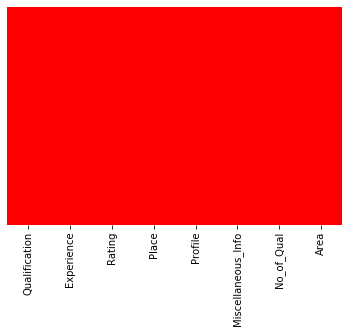

In [30]:
sns.heatmap(test_df.isnull(),yticklabels=False,cbar=False,cmap='rainbow_r')

 - Also our Test dataset is having no Null Values

 - Lets Rearrange the column for better approach:

In [31]:
train_df = train_df[['Qualification','No_of_Qual','Profile','Experience','Rating','Place','Area','Miscellaneous_Info','Fees']]

In [32]:
test_df = test_df[['Qualification','No_of_Qual','Profile','Experience','Rating','Place','Area','Miscellaneous_Info']]

# Visulaization

Text(0.5, 1.0, 'Doctors in different Profile')

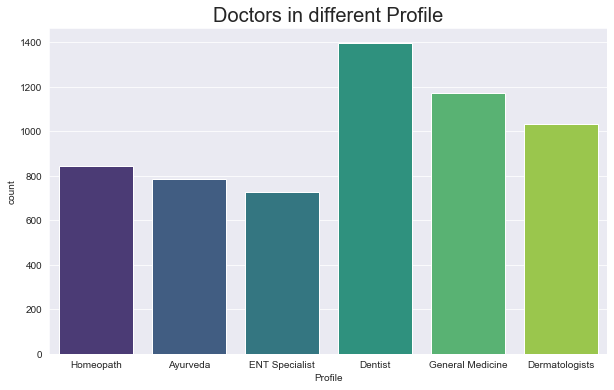

In [33]:
plt.figure(figsize=(10,6))
sns.set_style("darkgrid")
sns.countplot("Profile",data=train_df,palette='viridis')
plt.title("Doctors in different Profile",fontsize=20)

 - Observation:\
   -Most of the Doctors are Dentist followed by General Medicine and Dermatologists.\
   -As compare to other profile ENT Specialist are less.\
   -There are almost same number of Doctors belonging to Homeopath and Ayurveda

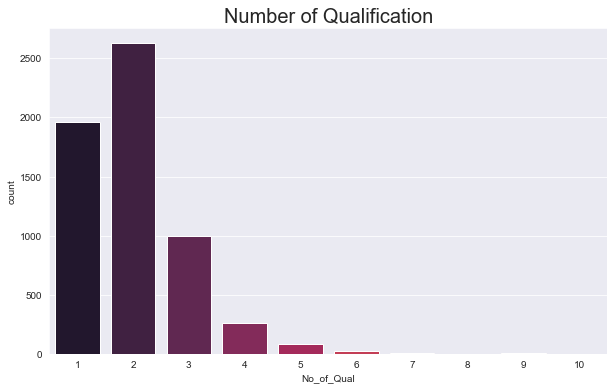

2     2628
1     1961
3      995
4      257
5       84
6       23
7        6
9        3
8        2
10       1
Name: No_of_Qual, dtype: int64


In [34]:
plt.figure(figsize=(10,6))
sns.set_style("darkgrid")
sns.countplot("No_of_Qual",data=train_df,palette='rocket')
plt.title("Number of Qualification",fontsize=20)
plt.show()

print(train_df['No_of_Qual'].value_counts())

 - We can see that most of the doctor are having two qualification
 - There is one doctor who is having 10 qualification
 - Two of the doctors are having 8 qualification
 - And three of the doctors are having 9 qualification

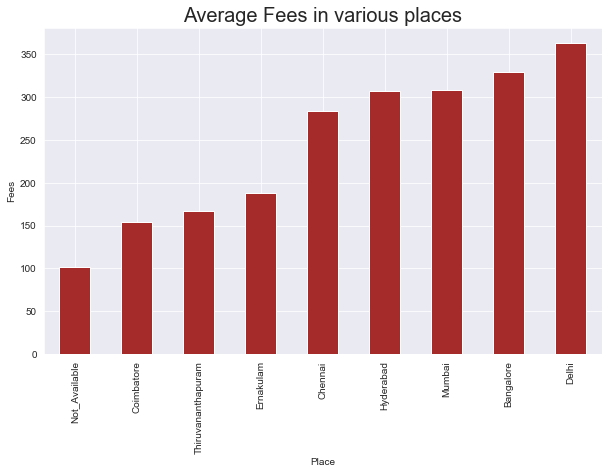

Place
Delhi                 362.911392
Bangalore             328.842607
Mumbai                308.292863
Hyderabad             307.507886
Chennai               283.602339
Ernakulam             188.431373
Thiruvananthapuram    167.267442
Coimbatore            154.298246
Not_Available         102.000000
Name: Fees, dtype: float64


In [35]:
plt.figure(figsize=(10,6))
train_df.groupby('Place')['Fees'].mean().sort_values().plot(kind='bar',color='brown')
plt.xlabel("Place")
plt.ylabel("Fees")
plt.title("Average Fees in various places",fontsize=20)
plt.show()

print(train_df.groupby('Place')['Fees'].mean().sort_values(ascending=False))

 - We can see that Delhi is having the highest average fees 
 - Those Places whose names are not available are having an average fees of 102

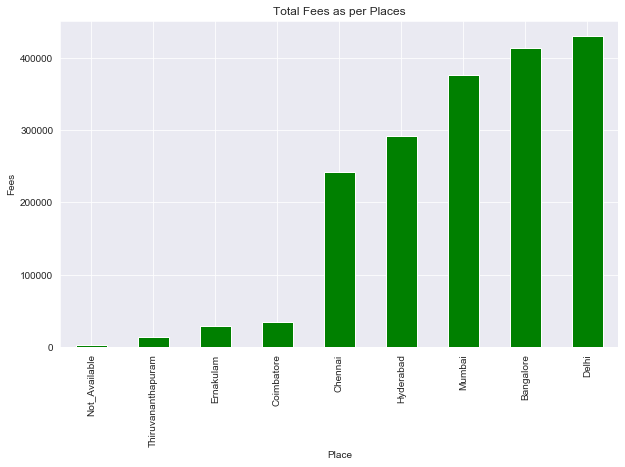

Place
Delhi                 430050
Bangalore             413684
Mumbai                375809
Hyderabad             292440
Chennai               242480
Coimbatore             35180
Ernakulam              28830
Thiruvananthapuram     14385
Not_Available           2550
Name: Fees, dtype: int64


In [36]:
plt.figure(figsize=(10,6))
train_df.groupby('Place')['Fees'].sum().sort_values().plot(kind='bar',color='green')
plt.xlabel("Place")
plt.ylabel("Fees")
plt.title("Total Fees as per Places")
plt.show()

print(train_df.groupby('Place')['Fees'].sum().sort_values(ascending=False))

 - We can see that Delhi is having the highest sum of fees collected followed by Banglore and Mumbai

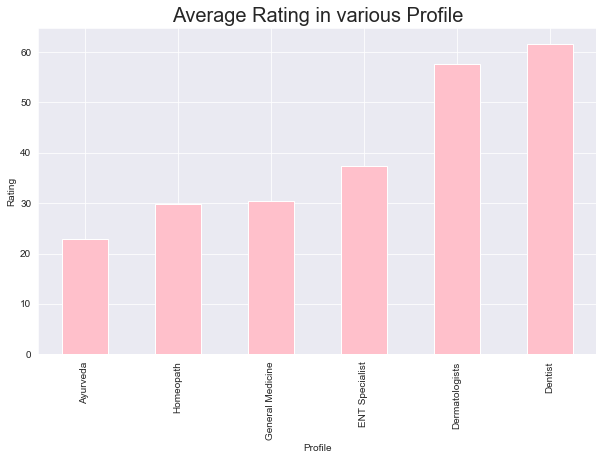

Number of Doctors in different Profiles are: 
 Dentist             1396
General Medicine    1173
Dermatologists      1034
Homeopath            843
Ayurveda             786
ENT Specialist       728
Name: Profile, dtype: int64


In [37]:
plt.figure(figsize=(10,6))
train_df.groupby('Profile')['Rating'].mean().sort_values().plot(kind='bar',color='pink')
plt.xlabel("Profile")
plt.ylabel("Rating")
plt.title("Average Rating in various Profile",fontsize=20)
plt.show()

print("Number of Doctors in different Profiles are:",'\n',train_df['Profile'].value_counts().sort_values(ascending=False))

 - Observation:
   - Dentist Profile have got the highest Rating but they also have maximum number of doctors in that profile.
   - But, General Medicine Profile is having the 2nd highest number of doctors in that profile but it is having the third lowest ratings.
   - Where as least number of doctors are having the profile of ENT Specialist but still they have got 3rd highest average ratings, seems like ENT Specialist are real good.
   - Same goes with Dermatelogists also, they are having second highest rating having third highest number of doctors in that profile

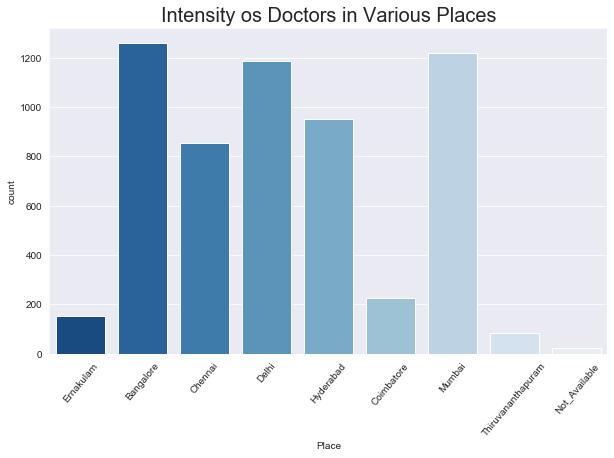

Bangalore             1258
Mumbai                1219
Delhi                 1185
Hyderabad              951
Chennai                855
Coimbatore             228
Ernakulam              153
Thiruvananthapuram      86
Not_Available           25
Name: Place, dtype: int64


In [38]:
plt.figure(figsize=(10,6))
sns.set_style("darkgrid")
sns.countplot("Place",data=train_df,palette='Blues_r')
plt.title("Intensity os Doctors in Various Places",fontsize=20)
plt.xticks(rotation=50)
plt.show()

print(train_df['Place'].value_counts())

 - Observation:
   - Most of the doctors are in Banglore as per the datase.
   - Delhi being at 3rd number in number of doctor as per places is still having highest collection of fees and average fees, which means fees of doctors in Delhi is much higher than the doctors from Banglore and Mumbai

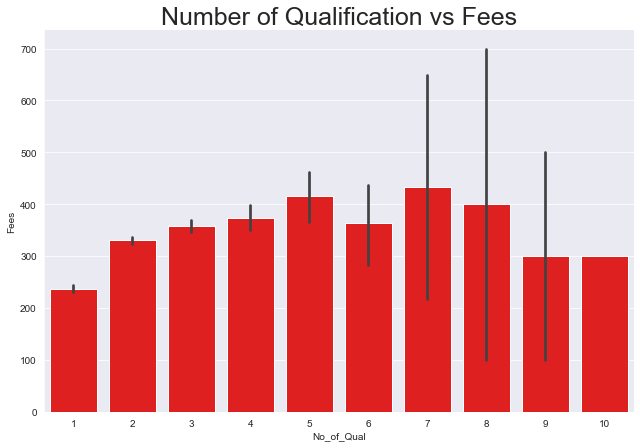

In [39]:
sns.catplot(x='No_of_Qual',y='Fees', data=train_df.sort_values("Fees"),kind='bar',height=6,aspect= 1.5,color='r')
plt.title("Number of Qualification vs Fees",fontsize=25)
plt.show()

 - Observation:
   - We can see that there is a high variation in fees value of those Doctors who are having 7, 8 and 9 number of qualification.
   - Maximum Number of Qualification was 2, and we can see that maximum fees charge for those doctor is around 350.
   - Only one doctor was having 10 number of qualification and he is having the consultation fees of 300.

<Figure size 720x504 with 0 Axes>

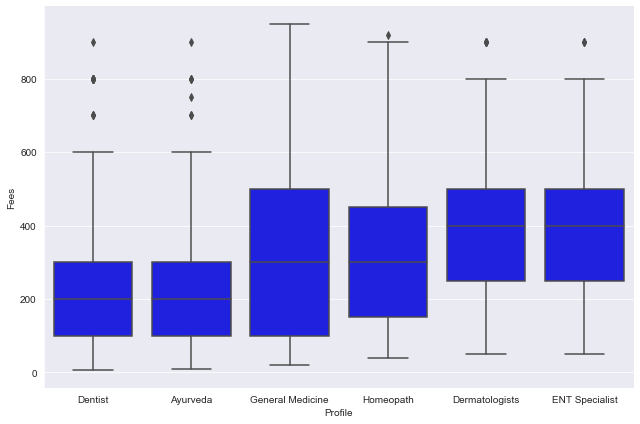

In [40]:
plt.figure(figsize=(10,7))
sns.catplot(x='Profile',y='Fees', data=train_df.sort_values("Fees"),kind='box',height=6,aspect= 1.5,color='b')
plt.show()

- Observation
  - Dentist Profile is having an average fees of 200 rupees.
  - Ayurveda profile is having an average fees of 200 rupees.
  - General Medicine profile is having highest range of fees.
  - Homeopath is having same average fees as of General Medicine which is around 300 rupees.
  - Dermatologists and ENT Specialist both are having an average fees of 400 rupees and maximum fees is 800.

Statistical Summary:

In [41]:
train_df.describe().T

,count,mean,std,min,25%,50%,75%,max
No_of_Qual,5960.0,1.993792,0.964269,1.0,1.0,2.0,2.0,10.0
Experience,5960.0,17.303020,11.143489,0.0,9.0,14.0,23.0,66.0
Rating,5960.0,42.224329,47.341747,0.0,0.0,0.0,96.0,100.0
Miscellaneous_Info,5960.0,0.560570,0.496359,0.0,0.0,1.0,1.0,1.0
Fees,5960.0,307.954362,190.934916,5.0,150.0,300.0,500.0,950.0


Observation:
 - We can see if we include all the doctors irrespective of their Place or the Profile than the average fees comes to around 308 rupees.
 - Again the rating comes around 43%, But we should keep in mind that we have replaced more than 3000 ratings with zero as they were having null values, but still the average rating is around 43% that means our doctors have good ratings.
 - Maximum years of experience by a docctor is of 66 years, THATS HUGE!!!! 

In [42]:
#Checking the Skewness of Data
train_df.drop('Fees',axis=1).skew()

No_of_Qual            1.433475
Experience            0.991306
Rating                0.246885
Miscellaneous_Info   -0.244141
dtype: float64

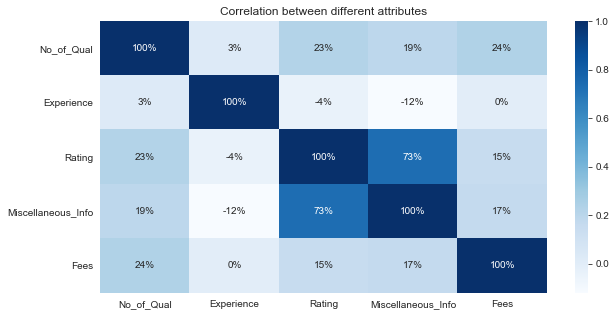

In [43]:
#Correlation
plt.figure(figsize=(10,5))
sns.heatmap(train_df.drop(['Qualification','Area'],axis=1).corr(),annot=True,fmt='.0%',cmap='Blues')
plt.title("Correlation between different attributes")
plt.show()

 - Observation:
   - No_of_qual, Miscellaneous Info and Rating is moderately correlated with the Fees
   - Experience is less correlated with Fees
   - Miscellaneous Info and rating are highly correlated
   - Number of qualification is also moderatley correlated with Rating

In [44]:
train_df.head()

,Qualification,No_of_Qual,Profile,Experience,Rating,Place,Area,Miscellaneous_Info,Fees
0,"BHMS, MD - Homeopathy",2,Homeopath,24,100,Ernakulam,Kakkanad,1,100
1,"BAMS, MD - Ayurveda Medicine",2,Ayurveda,12,98,Bangalore,Whitefield,1,350
2,"MBBS, MS - Otorhinolaryngology",2,ENT Specialist,9,0,Bangalore,Mathikere - BEL,0,300
3,"BSc - Zoology, BAMS",2,Ayurveda,12,0,Bangalore,Bannerghatta Road,1,250
4,BAMS,1,Ayurveda,20,100,Chennai,Keelkattalai,1,250


In [45]:
# As we already have number of qualification we will be dropping Qualification column
train_df.drop(['Qualification'],axis=1,inplace=True)

In [46]:
train_df.head()

,No_of_Qual,Profile,Experience,Rating,Place,Area,Miscellaneous_Info,Fees
0,2,Homeopath,24,100,Ernakulam,Kakkanad,1,100
1,2,Ayurveda,12,98,Bangalore,Whitefield,1,350
2,2,ENT Specialist,9,0,Bangalore,Mathikere - BEL,0,300
3,2,Ayurveda,12,0,Bangalore,Bannerghatta Road,1,250
4,1,Ayurveda,20,100,Chennai,Keelkattalai,1,250


 - Okay So now our data is having no Object type column, which means its ready for model building

In [47]:
# We will do the same with test dataset
test_df.head()

,Qualification,No_of_Qual,Profile,Experience,Rating,Place,Area,Miscellaneous_Info
0,MBBS,1,General Medicine,35,0,Mumbai,Ghatkopar East,0
1,"MBBS, Diploma in Otorhinolaryngology (DLO)",2,ENT Specialist,31,0,Hyderabad,West Marredpally,0
2,"MBBS, DDVL",2,Dermatologists,40,70,Chennai,KK Nagar,1
3,BAMS,1,Ayurveda,0,0,Delhi,New Ashok Nagar,0
4,"BDS, MDS - Conservative Dentistry & Endodontics",2,Dentist,16,100,Bangalore,Kanakpura Road,1


In [48]:
#train_df = pd.get_dummies(train_df,columns=['Profile','Place'])
from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder()

variable = ['Profile','Area','Place']
for i in variable:
    train_df[i] = lb.fit_transform(train_df[i])

In [49]:
train_df.head()

,No_of_Qual,Profile,Experience,Rating,Place,Area,Miscellaneous_Info,Fees
0,2,5,24,100,4,297,1,100
1,2,0,12,98,0,857,1,350
2,2,3,9,0,0,453,0,300
3,2,0,12,0,0,68,1,250
4,1,0,20,100,1,336,1,250


In [50]:
train_df.dtypes

No_of_Qual            int64
Profile               int32
Experience            int64
Rating                int32
Place                 int32
Area                  int32
Miscellaneous_Info    int64
Fees                  int64
dtype: object

In [51]:
## Removal of outliers 
from scipy.stats import zscore
z_score = abs(zscore(train_df))
print(train_df.shape)
train_df_final = train_df.loc[(z_score<3).all(axis=1)]
print(train_df_final.shape)

(5960, 8)
(5784, 8)


In [52]:
train_df_final['Fees'] = np.log1p(train_df_final['Fees'])
train_df_final['Rating'] = np.log1p(train_df_final['Rating'])

In [53]:
train_df_final.reset_index(drop=True, inplace=True)

In [54]:
## Checking the Skeweness of the column:
train_df_final.skew()

No_of_Qual            0.621132
Profile               0.127181
Experience            0.890563
Rating                0.235169
Place                 0.047946
Area                  0.104475
Miscellaneous_Info   -0.234010
Fees                 -0.310041
dtype: float64

(array([0, 1, 2, 3, 4, 5, 6]), <a list of 7 Text xticklabel objects>)

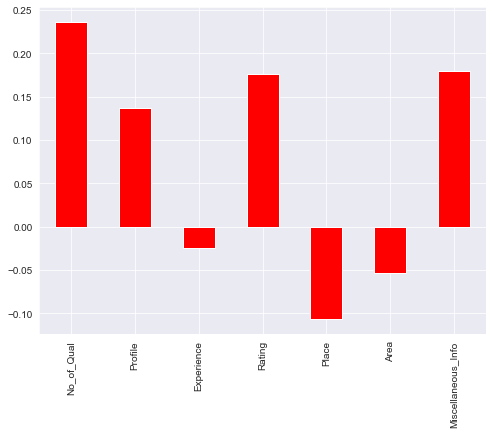

In [55]:
## Checking the correlation of different attributes with the target variable:
plt.figure(figsize=(8,6))
sns.set_style('dark')
train_df_final.drop(['Fees'],axis=1).corrwith(train_df_final['Fees']).plot(kind='bar',grid=True,color='r')
plt.xticks(rotation=90)

# Model Building: 

In [56]:
## Features and Target:
x = train_df_final.drop(['Fees'],axis=1)
y = train_df_final[['Fees']]

In [57]:
x

,No_of_Qual,Profile,Experience,Rating,Place,Area,Miscellaneous_Info
0,2,5,24,4.615121,4,297,1
1,2,0,12,4.595120,0,857,1
2,2,3,9,0.000000,0,453,0
3,2,0,12,0.000000,0,68,1
4,1,0,20,4.615121,1,336,1
...,...,...,...,...,...,...,...
5779,2,3,19,4.595120,0,70,1
5780,1,4,33,0.000000,1,537,0
5781,1,4,41,4.584967,3,216,1
5782,2,4,15,4.510860,6,842,1


In [58]:
from sklearn.linear_model import LinearRegression,Lasso,Ridge,ElasticNet
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor

#Importing Boosting model:
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor

#Importing error metrices:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.model_selection import GridSearchCV,cross_val_score

In [59]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,random_state=0,test_size=0.2)

In [60]:
model = [LinearRegression(),SVR(),DecisionTreeRegressor(),KNeighborsRegressor(),Lasso(),Ridge(),ElasticNet(),
        RandomForestRegressor(),AdaBoostRegressor(),GradientBoostingRegressor()]

for m in model:
    m.fit(x_train,y_train)
    score=m.score(x_train,y_train)
    predm=m.predict(x_test)
    print('Score of ',m," is: ",score)
    print("MAE:",mean_absolute_error(y_test,predm))
    print("MSE:",mean_squared_error(y_test,predm))
    print("RMSE:",np.sqrt(mean_squared_error(y_test,predm)))
    print("***********************************************************************************************")
    print("\n")

Score of  LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)  is:  0.11874390587906025
MAE: 0.5496041568091619
MSE: 0.4346078483933788
RMSE: 0.6592479415162241
***********************************************************************************************


Score of  SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)  is:  0.01560961242950354
MAE: 0.5745505727798559
MSE: 0.46362978260837895
RMSE: 0.680903651487036
***********************************************************************************************


Score of  DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
    

 - We can see that our best model out all the above models is GradientBoostingRegressor() as the error is least:

In [61]:
## Hyper-Tuning the Model:
from sklearn.model_selection import GridSearchCV
parameters={'n_estimators':[100,150,170,200],'max_depth':[1,5,15,20]}
GB=GradientBoostingRegressor()

clf=GridSearchCV(GB,parameters)
clf.fit(x,y)
print(clf.best_params_)

{'max_depth': 5, 'n_estimators': 150}


In [62]:
from sklearn.ensemble import GradientBoostingRegressor
x_train1, x_test1, y_train1, y_test1 = train_test_split(x,y,random_state=60,test_size=0.2)
gb = GradientBoostingRegressor(n_estimators=170,min_samples_split=7,min_samples_leaf=1,
                          max_features='auto',max_depth=10)
gb.fit(x_train1,y_train1)
print("Score: ",gb.score(x_train1,y_train1))
y_pred=gb.predict(x_test1)
print('\n')
print("MAE: ",mean_absolute_error(y_test1,y_pred))
print("MSE: ",mean_squared_error(y_test1,y_pred))
print("RMSE: ",np.sqrt(mean_squared_error(y_test1,y_pred)))

Score:  0.9583775192145925


MAE:  0.4986038406372669
MSE:  0.41718935110125827
RMSE:  0.645901967098149


 - LETS TRY OUR MODEL ON TEST DATASET

In [63]:
from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder()

variable = ['Profile','Area','Place']
for i in variable:
    test_df[i] = lb.fit_transform(test_df[i])

In [64]:
test_df.drop('Qualification',axis=1,inplace=True)

In [65]:
test_df.head()

,No_of_Qual,Profile,Experience,Rating,Place,Area,Miscellaneous_Info
0,1,4,35,0,6,142,0
1,2,3,31,0,5,578,0
2,2,2,40,70,1,212,1
3,1,0,0,0,3,373,0
4,2,1,16,100,0,231,1


In [66]:
from sklearn.ensemble import GradientBoostingRegressor
x_train2, x_test2, y_train2, y_test2 = train_test_split(x,y,random_state=60,test_size=0.2)
gb = GradientBoostingRegressor(n_estimators=170,min_samples_split=7,min_samples_leaf=1,
                          max_features='auto',max_depth=10)
gb.fit(x_train2,y_train2)
y_pred=gb.predict(test_df)

In [67]:
y_pred_df = pd.DataFrame(np.exp(y_pred),columns=['Predicted_Fees'])

In [68]:
y_pred_df.head()

,Predicted_Fees
0,186.920543
1,211.071875
2,127.550760
3,177.339166
4,126.614903


In [69]:
## Let's Save the Model:
from sklearn.externals import joblib
joblib.dump(gb,'gb_DocFees.pkl')

['gb_DocFees.pkl']